In [1]:
import logging
import os
from PIL import Image
import six

from torch.utils.data import DataLoader

import lmdb
from tqdm.auto import tqdm
import pyarrow as pa
import lz4framed

import torch.utils.data as data


In [2]:
from cassava.lmdb_dataset import *
from cassava.utils import *
from cassava.transforms import get_test_transforms

In [3]:
unnorm = Unnormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [4]:
train_lmdb = context.catalog.load('train_lmdb')

2020-12-23 18:12:36,284 - kedro.io.data_catalog - INFO - Loading data from `train_lmdb` (KedroImageLMDBDataSet)...


In [5]:
unlabelled_lmdb = context.catalog.load('unlabelled_lmdb')

2020-12-23 18:12:36,315 - kedro.io.data_catalog - INFO - Loading data from `unlabelled_lmdb` (KedroImageLMDBDataSet)...


In [6]:
train_lmdb.transform = None
unlabelled_lmdb.transform = None

In [7]:
train_2020_indices = np.array(range(len(train_lmdb)))[train_lmdb.sources == 'train_2020']

In [8]:
train_2019_indices = np.array(range(len(train_lmdb)))[train_lmdb.sources == 'train_2019']

In [11]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms

def lmdb_2019_transforms():
    return A.Compose([
        A.ToFloat(max_value=1.0),
        A.CenterCrop(465, 350),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

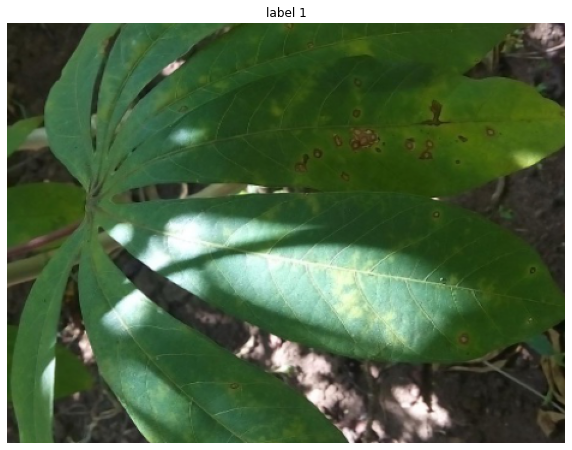

In [12]:
idx = np.random.choice(train_2019_indices)
img, label = train_lmdb[idx]
plt.figure(figsize=(10, 10))
plot_image(unnorm(lmdb_2019_transforms()(image=img)['image']), label=f'label {label}')
plt.show()

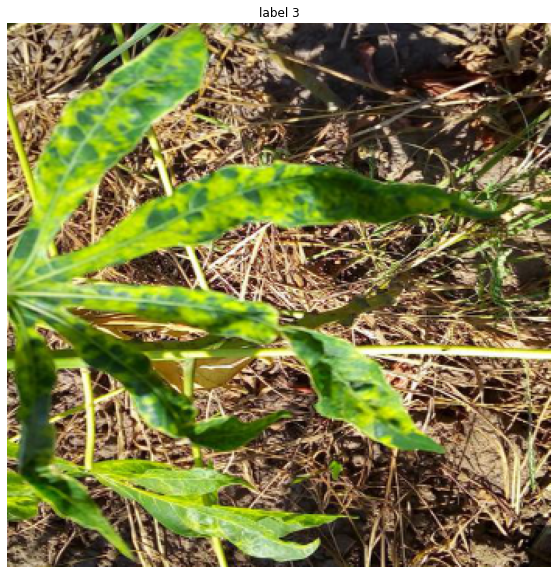

In [13]:
idx = np.random.choice(train_2020_indices)
img, label = train_lmdb[idx]
plt.figure(figsize=(10, 10))
plot_image(unnorm(get_test_transforms()(image=img)['image']), label=f'label {label}')
plt.show()

In [ ]:
i = np.random.choice(range(len(train_lmdb)))
img, label = train_lmdb[i]
source = train_lmdb.sources[i]
plt.figure(figsize=(10, 10))
plot_image(unnorm(img), label=f'label {label}, {source}')
plt.show()

In [ ]:
i = np.random.choice(range(len(unlabelled_lmdb)))
img, label = unlabelled_lmdb[i]
source = unlabelled_lmdb.sources[i]
plt.figure(figsize=(10, 10))
plot_image(unnorm(img), label=f'label {label}, {source}')
plt.show()